In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [55]:
day_price_0_df = pd.read_csv("./round-3-island-data-bottle/prices_round_3_day_0.csv", delimiter=";")
day_price_1_df = pd.read_csv("./round-3-island-data-bottle/prices_round_3_day_1.csv", delimiter=";")
day_price_2_df = pd.read_csv("./round-3-island-data-bottle/prices_round_3_day_2.csv", delimiter=";")

# merge all the dataframes
merged_df = pd.concat([day_price_0_df, day_price_1_df, day_price_2_df])
merged_df["continuous_timestamp"] = merged_df["day"] * 1e6 + merged_df["timestamp"]

In [56]:
product_names = [
    "RAINFOREST_RESIN", "KELP", "SQUID_INK",
    "CROISSANTS", "JAMS", "DJEMBES",
    "PICNIC_BASKET1", "PICNIC_BASKET2",
    "VOLCANIC_ROCK",
    "VOLCANIC_ROCK_VOUCHER_10500",
    "VOLCANIC_ROCK_VOUCHER_10250",
    "VOLCANIC_ROCK_VOUCHER_10000",
    "VOLCANIC_ROCK_VOUCHER_9750",
    "VOLCANIC_ROCK_VOUCHER_9500",
]

products = {
    name: merged_df[merged_df["product"] == name].reset_index(drop=True)
    for name in product_names
}

In [57]:
products['VOLCANIC_ROCK']['log_return'] = np.log(products['VOLCANIC_ROCK']['mid_price'] / products['VOLCANIC_ROCK']['mid_price'].shift(1))
products['VOLCANIC_ROCK']["realised_vol"] = products['VOLCANIC_ROCK']['log_return'].rolling(window=10).std() * np.sqrt(365)

products['VOLCANIC_ROCK']

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,continuous_timestamp,log_return,realised_vol
0,0,0,VOLCANIC_ROCK,10502.0,205.0,NaN,NaN,NaN,NaN,10504,146,10505.0,59.0,NaN,NaN,10503.0,0.0,0.0,NaN,NaN
1,0,100,VOLCANIC_ROCK,10509.0,192.0,NaN,NaN,NaN,NaN,10511,122,10512.0,70.0,NaN,NaN,10510.0,0.0,100.0,0.000666,NaN
2,0,200,VOLCANIC_ROCK,10512.0,167.0,NaN,NaN,NaN,NaN,10514,109,10515.0,58.0,NaN,NaN,10513.0,0.0,200.0,0.000285,NaN
3,0,300,VOLCANIC_ROCK,10517.0,118.0,10516.0,68.0,NaN,NaN,10518,118,10519.0,68.0,NaN,NaN,10517.5,0.0,300.0,0.000428,NaN
4,0,400,VOLCANIC_ROCK,10509.0,128.0,10508.0,73.0,NaN,NaN,10510,128,10511.0,73.0,NaN,NaN,10509.5,0.0,400.0,-0.000761,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2,999500,VOLCANIC_ROCK,10167.0,110.0,10166.0,51.0,NaN,NaN,10169,156,NaN,NaN,NaN,NaN,10168.0,0.0,2999500.0,0.000148,0.006601
29996,2,999600,VOLCANIC_ROCK,10166.0,161.0,NaN,NaN,NaN,NaN,10168,101,10169.0,60.0,NaN,NaN,10167.0,0.0,2999600.0,-0.000098,0.005962
29997,2,999700,VOLCANIC_ROCK,10166.0,143.0,10165.0,51.0,NaN,NaN,10168,194,NaN,NaN,NaN,NaN,10167.0,0.0,2999700.0,0.000000,0.005767
29998,2,999800,VOLCANIC_ROCK,10167.0,119.0,10166.0,57.0,NaN,NaN,10168,119,10169.0,57.0,NaN,NaN,10167.5,0.0,2999800.0,0.000049,0.005302


In [58]:
def calculate_spread(row):
    return row['ask_price_1'] - row['bid_price_1']

# define function to plot volatitlity
def calculate_volatility(data, window_size=20):
    # Calculate log returns
    log_returns = np.log(data['mid_price']).diff()
    
    # Calculate rolling standard deviation of log returns
    volatility = log_returns.rolling(window=window_size).std()

    return volatility

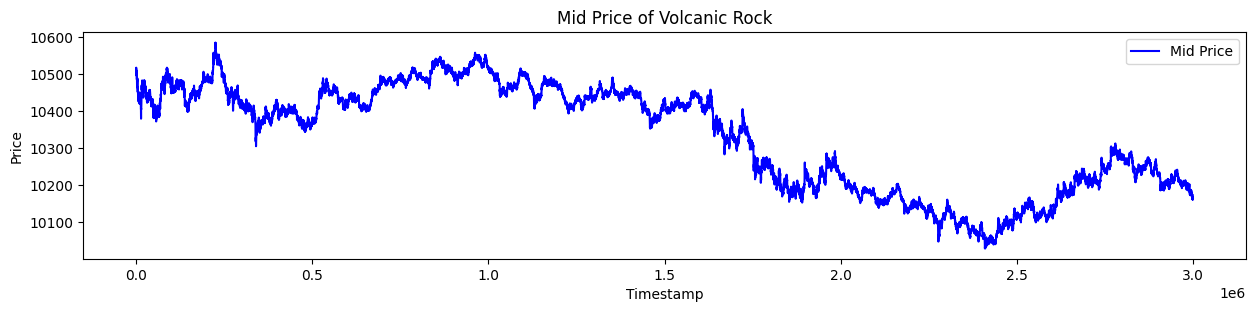

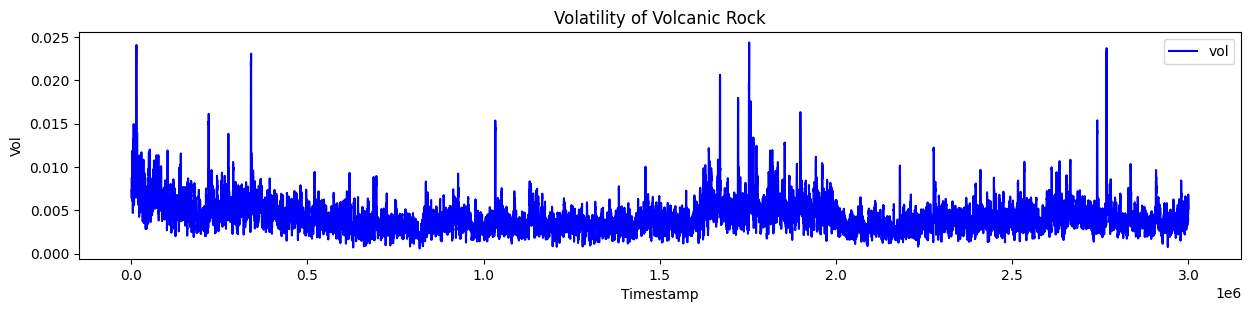

In [74]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.plot(products['VOLCANIC_ROCK']['continuous_timestamp'], products['VOLCANIC_ROCK']['mid_price'], label='Mid Price', color='blue')
plt.title('Mid Price of Volcanic Rock')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()

plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.plot(products['VOLCANIC_ROCK']['continuous_timestamp'], products['VOLCANIC_ROCK']['realised_vol'], label='vol', color='blue')
plt.title('Volatility of Volcanic Rock')
plt.xlabel('Timestamp')
plt.ylabel('Vol')
plt.legend()

In [63]:
# calculate average realised volatility
avg_realised_vol = products['VOLCANIC_ROCK']['realised_vol'].mean()
print(f"Average realised volatility: {avg_realised_vol}")

Average realised volatility: 0.004379021224579284


In [75]:
import numpy as np
import pandas as pd
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    """
    Calculate Black-Scholes call option price
    
    Parameters:
    S : float - current price of the underlying asset
    K : float - strike price of the option
    T : float - time to maturity in years
    r : float - risk-free interest rate
    sigma : float - volatility of the underlying asset
    
    Returns:
    float - call option price
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def calculate_option_prices(df, strike_prices, time_to_maturity_years, risk_free_rate=0):
    """
    Calculate theoretical call option prices for each row in the dataframe
    
    Parameters:
    df : DataFrame - contains underlying asset data
    strike_prices : list - list of strike prices to evaluate
    time_to_maturity_years : float - time to option expiration in years
    risk_free_rate : float - annual risk-free rate (default 2%)
    
    Returns:
    DataFrame - original data with added columns for each strike price's call option price
    """
    # Make a copy of the dataframe to avoid modifying the original
    result_df = df.copy()
    
    # Calculate realized volatility (using a rolling window if needed)
    # Here we'll use a simple approach - you may want to customize this
    if 'realised_vol' not in df.columns or df['realised_vol'].isnull().all():
        # If no volatility data, we'll use a default value (20%)
        # In practice, you'd want to calculate this properly
        df['volatility'] = 0.004379021224579284
    else:
        df['volatility'] = df['realised_vol'].fillna(method='ffill').fillna(0.20)
    
    # Calculate option prices for each strike price
    for strike in strike_prices:
        col_name = f'call_{strike}'
        result_df[col_name] = df.apply(
            lambda row: black_scholes_call(
                S=row['mid_price'],
                K=strike,
                T=time_to_maturity_years,
                r=risk_free_rate,
                sigma=row['volatility']
            ),
            axis=1
        )
    
    return result_df

# Example usage:
# Assuming your dataframe is named 'df'
strike_prices = [10500, 10250, 10000, 9750, 9500]  # Example strike prices
time_to_maturity = 7/365  # 3 months to expiration

# Calculate option prices
option_df = calculate_option_prices(VOLCANIC_ROCK, strike_prices, time_to_maturity)
option_df = option_df.reset_index(drop=True)

# Display results
# print(option_df[['timestamp', 'mid_price', 'realised_vol', 'call_10500', 'call_10250', 'call_10000', 'call_9750', 'call_9500']].head())

option_df = option_df.reset_index(drop=True)

products['VOLCANIC_ROCK_VOUCHER_10500']['theoretical_price'] = option_df['call_10500']
products['VOLCANIC_ROCK_VOUCHER_10250']['theoretical_price'] = option_df['call_10250']
products['VOLCANIC_ROCK_VOUCHER_10000']['theoretical_price'] = option_df['call_10000']
products['VOLCANIC_ROCK_VOUCHER_9750']['theoretical_price'] = option_df['call_9750']
products['VOLCANIC_ROCK_VOUCHER_9500']['theoretical_price'] = option_df['call_9500']

for name in product_names:
    if "VOLCANIC_ROCK_VOUCHER" in name:
        products[name]['diff'] = products[name]['mid_price'] - products[name]['theoretical_price']

/var/folders/jk/6z666kqx1nl3m58xqrk6cdv40000gn/T/ipykernel_71303/2307242939.py:48: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['volatility'] = df['realised_vol'].fillna(method='ffill').fillna(0.20)


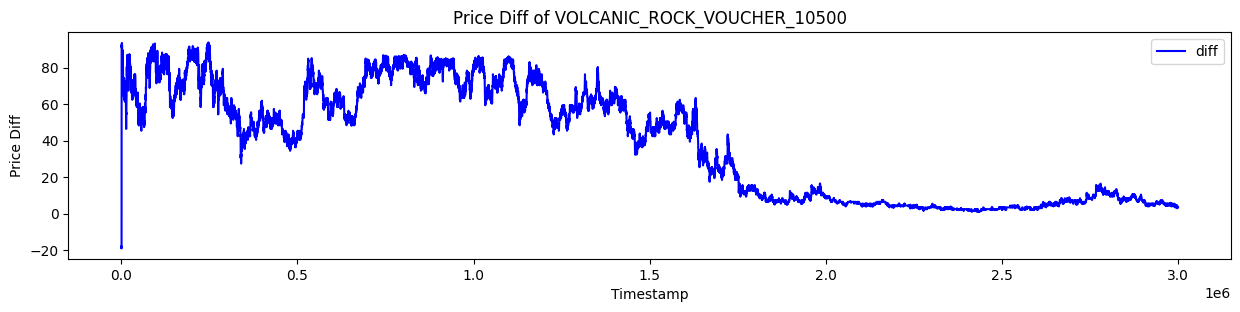

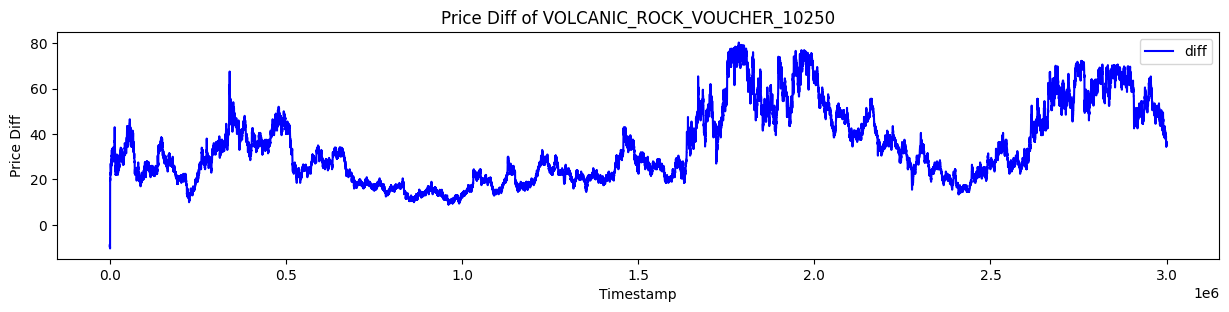

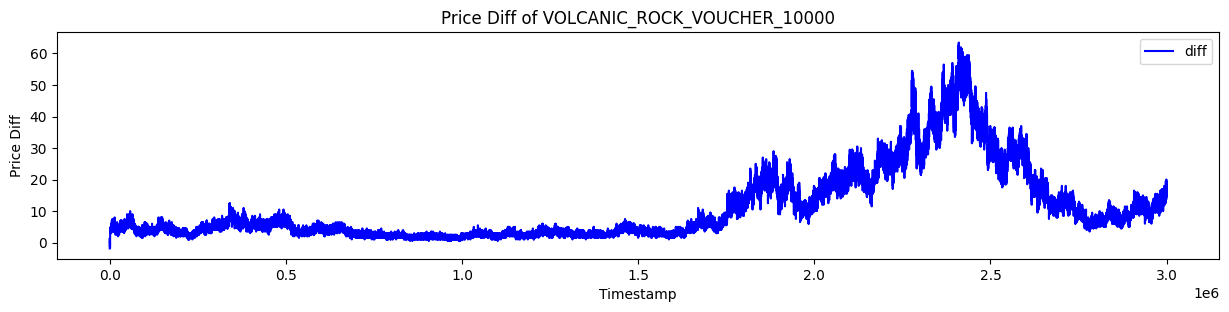

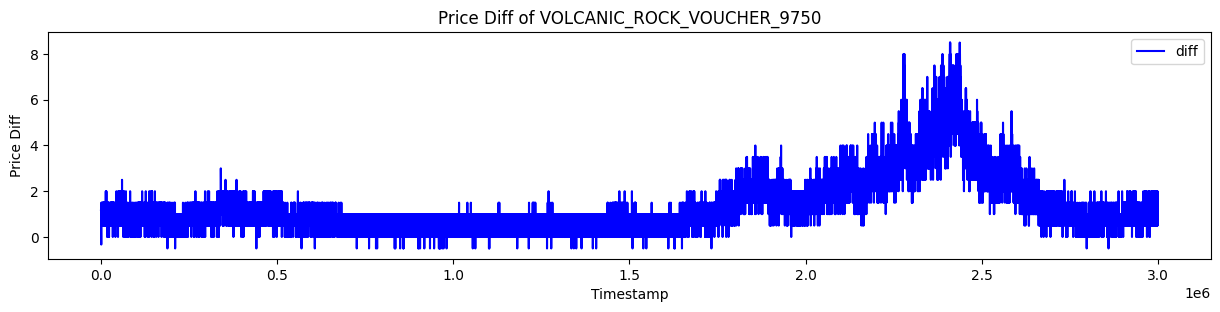

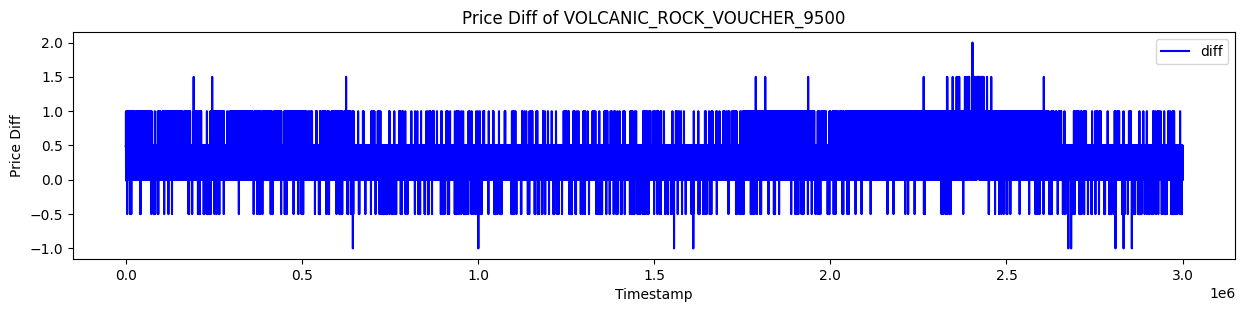

In [76]:
#plot price diff
for name in product_names:
    if "VOLCANIC_ROCK_VOUCHER" in name:
        plt.figure(figsize=(15, 10))
        plt.subplot(3, 1, 1)
        plt.plot(products[name]['continuous_timestamp'], products[name]['diff'], label='diff', color='blue')
        plt.title(f'Price Diff of {name}')
        plt.xlabel('Timestamp')
        plt.ylabel('Price Diff')
        plt.legend()
        plt.show()

In [ ]:
from scipy.optimize import brentq

def implied_volatility_call(market_price, S, K, T, r, tol=1e-6, max_iter=100):
    """
    Calculate the implied volatility for a European call option.
    """
    def f(sigma):
        return black_scholes_call(S, K, T, r, sigma) - market_price
    
    # Check for arbitrage violation (market price less than intrinsic value)
    intrinsic = max(S - K, 0)
    if market_price < intrinsic:
        return np.nan

    try:
        iv = brentq(f, 1e-6, 5.0, xtol=tol, maxiter=max_iter)
    except Exception:
        iv = np.nan
    return iv

# Calculate implied volatility for each call option in option_df
for strike in strike_prices:
    col_call = f"call_{strike}"
    col_iv = f"implied_vol_{strike}"
    option_df[col_iv] = option_df.apply(lambda row: 
                                        implied_volatility_call(row[col_call],
                                                                  row['mid_price'],
                                                                  strike,
                                                                  time_to_maturity,
                                                                  r), axis=1)
    
# Display a sample of the result
print(option_df[[col for col in option_df.columns if "implied_vol" in col]].head())